IRIS Machine learning

In [231]:
import pandas as pd
import numpy as np
import seaborn as sns

In [230]:
iris_data = pd.read_csv("/mnt/d/Documents/jamprograms/QC/QML-L/Quantum-ml/data/Iris.csv")
iris_data = iris_data.drop("Id", axis=1)
iris_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [232]:
iris_data["Species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [233]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
numerical_labels = label_encoder.fit_transform(iris_data["Species"])
print(numerical_labels)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [234]:
iris_data["labels"] = numerical_labels

iris_data[["Species", "labels"]]

,Species,labels
0,Iris-setosa,0
1,Iris-setosa,0
2,Iris-setosa,0
3,Iris-setosa,0
4,Iris-setosa,0
...,...,...
145,Iris-virginica,2
146,Iris-virginica,2
147,Iris-virginica,2
148,Iris-virginica,2


In [235]:
iris_data = iris_data.drop("Species", axis=1)
iris_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,labels
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [185]:
iris_data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,labels
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [186]:
iris_data.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'labels'],
      dtype='object')

In [236]:
petal_features = iris_data[['PetalLengthCm', 'PetalWidthCm']]
petal_features

,PetalLengthCm,PetalWidthCm
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


In [237]:
target_labels = iris_data['labels']
target_labels = target_labels.to_numpy().reshape(-1, 1)

In [238]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(petal_features)
X_test_scaled = scaler.fit_transform(target_labels)


In [ ]:
X_train_scaled

In [ ]:
X_test_scaled

In [239]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_train_scaled, X_test_scaled, test_size=0.2, random_state=42)

In [ ]:
X_train

In [ ]:
X_test

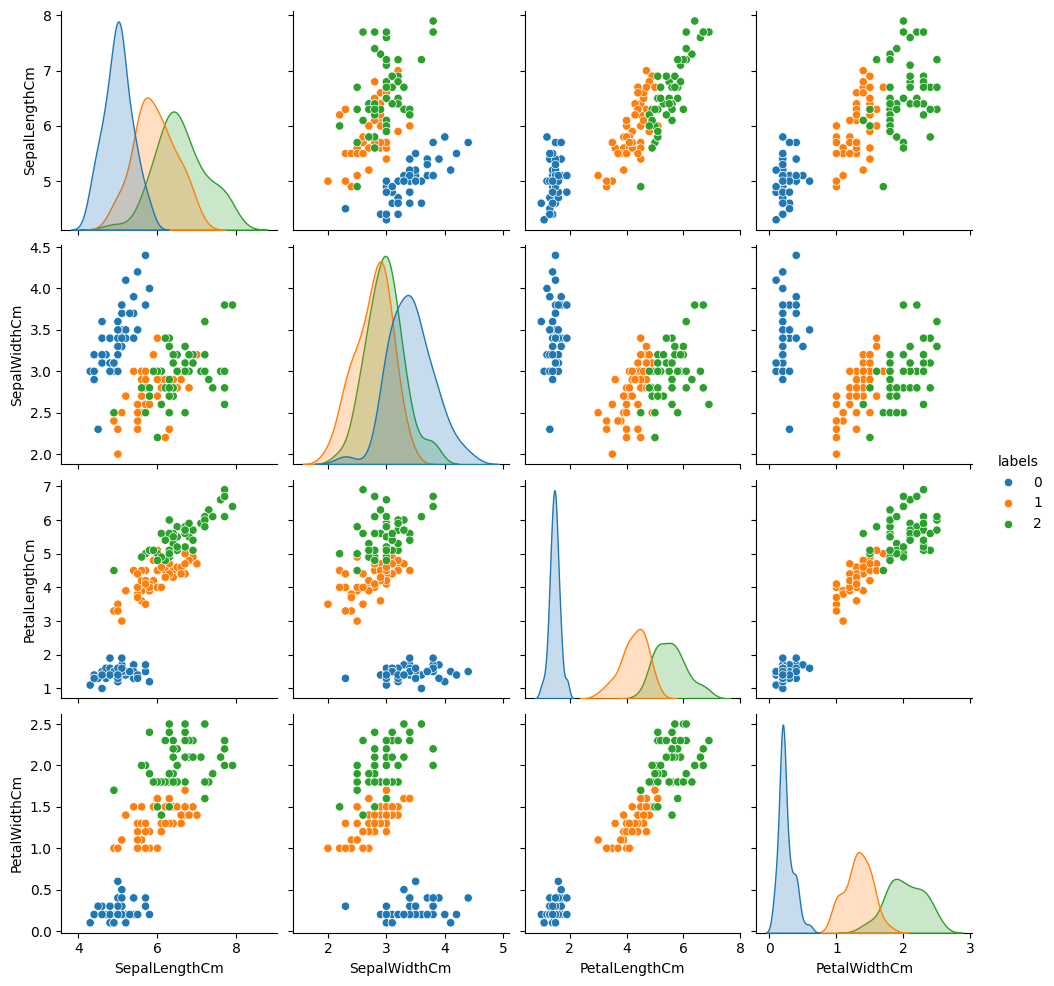

In [87]:
sns.pairplot(iris_data, hue="labels", palette="tab10")

In [240]:
from sklearn.model_selection import train_test_split
from qiskit.utils import algorithm_globals

algorithm_globals.random_seed = 123
train_features, test_features, train_labels, test_labels = train_test_split(
   X_train_scaled , target_labels, train_size=0.8, random_state=algorithm_globals.random_seed
)

In [ ]:
train_labels

In [241]:
from sklearn.svm import SVC

svc = SVC()
_ = svc.fit(train_features, train_labels)

/mnt/d/Documents/jamprograms/QC/QML-L/Quantum-ml/qcenv/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [242]:
train_score_c4 = svc.score(train_features, train_labels)
test_score_c4 = svc.score(test_features, test_labels)

print(f"Classical SVC on the training dataset: {train_score_c4:.2f}")
print(f"Classical SVC on the test dataset:     {test_score_c4:.2f}")

Classical SVC on the training dataset: 0.96
Classical SVC on the test dataset:     0.97


QML

In [243]:
from qiskit import IBMQ
import os
IBMQ.save_account(os.environ.get("IBM_API_KEY"), overwrite=True)
IBMQ.load_account()

ibmqfactory.load_account:WARNING:2023-10-31 18:53:18,803: Credentials are already in use. The existing account in the session will be replaced.


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [244]:
provider = IBMQ.get_provider("ibm-q")
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_lagos') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_nairobi') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_perth') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_brisbane') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [ ]:
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler

service = QiskitRuntimeService(channel="ibm_quantum", token=os.environ.get("IBM_API_KEY"))
backend = service.backend("simulator_stabilizer")
sampler = Sampler(session=backend)

# Build circuit
from qiskit import QuantumCircuit
circuit = QuantumCircuit(2, 2)
circuit.h(0)
circuit.cx(0,1)
circuit.measure([0,1], [0,1])

# Run the circuit and get result distribution
job = sampler.run(circuit)
quasi_dist = job.result().quasi_dists[0]
print(quasi_dist)

In [ ]:
from qiskit_aqt_provider import AQTProvider
provider = AQTProvider(os.environ.get("IBM_API_KEY"))
backend = provider.get_backend('simulator_stabilizer')

# Build circuit
from qiskit import QuantumCircuit
circuit = QuantumCircuit(2, 2)
circuit.h(0)
circuit.cx(0,1)
circuit.measure([0,1], [0,1])

# Transpile circuit
from qiskit import transpile
transpiled_circuit = transpile(circuit, backend)

# Run the circuit and get result
job = backend.run(transpiled_circuit)
counts = job.result().get_counts()
print(counts)

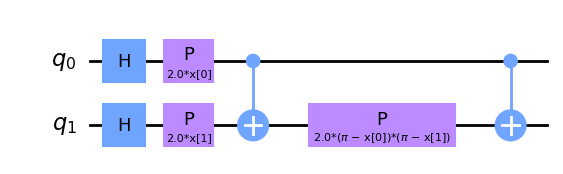

In [245]:
from qiskit.circuit.library import ZZFeatureMap

num_features = X_train_scaled.shape[1] # 2

feature_map = ZZFeatureMap(feature_dimension=num_features, reps=1)
feature_map.decompose().draw(output="mpl", fold=20)

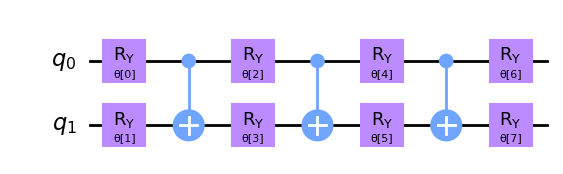

In [246]:
from qiskit.circuit.library import RealAmplitudes

ansatz = RealAmplitudes(num_qubits=num_features, reps=3)
ansatz.decompose().draw(output="mpl", fold=20)

In [247]:
from qiskit_ibm_runtime import QiskitRuntimeService

service = QiskitRuntimeService(channel="ibm_quantum", token=os.environ.get("IBM_API_KEY"))
backend = service.backend("ibmq_qasm_simulator")

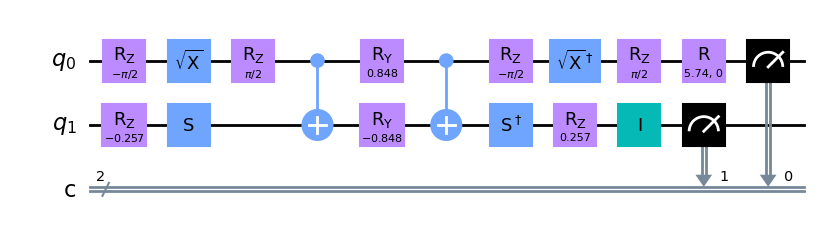

In [222]:
from qiskit.circuit.random import random_circuit

circuit = random_circuit(2, 2, seed=0, measure=True).decompose(reps=1)
display(circuit.draw("mpl"))

In [248]:
from qiskit_ibm_runtime import Sampler

sampler = Sampler(backend=backend)

In [224]:
job = sampler.run(circuit)
print(f">>> Job ID: {job.job_id()}")
print(f">>> Job Status: {job.status()}")

>>> Job ID: cl0dratunk5mjfn6ks90
>>> Job Status: JobStatus.RUNNING


In [ ]:
result = job.result()
print(f">>> {result}")
print(f"  > Quasi-probability distribution: {result.quasi_dists[0]}")
print(f"  > Metadata: {result.metadata[0]}")

In [249]:
from matplotlib import pyplot as plt
from IPython.display import clear_output

objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)


def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()

In [ ]:
train_labels

In [ ]:
import time
from qiskit_machine_learning.algorithms.classifiers import VQC
from qiskit.algorithms.optimizers import COBYLA

optimizer = COBYLA(maxiter=30)

vqc = VQC(
    sampler=sampler,
    feature_map=feature_map,
    ansatz=ansatz,  
    optimizer=optimizer,
    callback=callback_graph,
)

# clear objective value history
objective_func_vals = []

start = time.time()
vqc.fit(train_features, train_labels)
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")

In [252]:
train_score_q4 = vqc.score(train_features, train_labels)
test_score_q4 = vqc.score(test_features, test_labels)

print(f"Quantum VQC on the training dataset: {train_score_q4:.2f}")
print(f"Quantum VQC on the test dataset:     {test_score_q4:.2f}")

Quantum VQC on the training dataset: 0.97
Quantum VQC on the test dataset:     1.00


In [149]:
test_features

array([[0.66101695, 0.58333333],
       [0.76271186, 0.83333333],
       [0.77966102, 0.875     ],
       [0.52542373, 0.5       ],
       [0.08474576, 0.        ],
       [0.6440678 , 0.70833333],
       [0.57627119, 0.5       ],
       [0.05084746, 0.04166667],
       [0.06779661, 0.04166667],
       [0.57627119, 0.45833333],
       [0.69491525, 0.91666667],
       [0.06779661, 0.04166667],
       [0.49152542, 0.54166667],
       [0.76271186, 0.70833333],
       [0.86440678, 0.91666667],
       [0.81355932, 0.875     ],
       [0.05084746, 0.04166667],
       [0.01694915, 0.        ],
       [0.62711864, 0.54166667],
       [0.06779661, 0.08333333],
       [0.06779661, 0.04166667],
       [0.69491525, 0.58333333],
       [0.15254237, 0.04166667],
       [0.66101695, 0.70833333],
       [0.10169492, 0.04166667],
       [0.11864407, 0.04166667],
       [0.08474576, 0.125     ],
       [0.66101695, 0.79166667],
       [0.96610169, 0.875     ],
       [0.06779661, 0.04166667]])

In [ ]:
test_labels

In [159]:
i = 7
print(test_features[i])
print(test_labels[i])

new_data = test_features[i]
prediction = vqc.predict(new_data)
prediction

[0.05084746 0.04166667]
[0]


array(0)

In [253]:
new_data = [5.8,2.2]
prediction = vqc.predict(new_data)

if(prediction == [0]):
    print("Iris-setosa")
elif(prediction == [1]):
    print("Iris-versicolor")
else:
    print("Iris-virginica")

Iris-virginica


 QCNN

In [169]:
from qiskit.utils import algorithm_globals

algorithm_globals.random_seed = 42

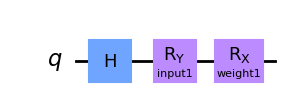

In [171]:
from qiskit.circuit import Parameter
from qiskit import QuantumCircuit

params1 = [Parameter("input1"), Parameter("weight1")]
qc1 = QuantumCircuit(1)
qc1.h(0)
qc1.ry(params1[0], 0)
qc1.rx(params1[1], 0)
qc1.draw("mpl")

In [172]:
from qiskit.quantum_info import SparsePauliOp

observable1 = SparsePauliOp.from_list([("Y" * qc1.num_qubits, 1)])

In [173]:
from qiskit_machine_learning.neural_networks import EstimatorQNN

estimator_qnn = EstimatorQNN(
    circuit=qc1, observables=observable1, input_params=[params1[0]], weight_params=[params1[1]]
)
estimator_qnn

EstimatorQNN

input parameters: ['input[0]', 'input[1]']
weight parameters: ['weight[0]', 'weight[1]', 'weight[2]', 'weight[3]']


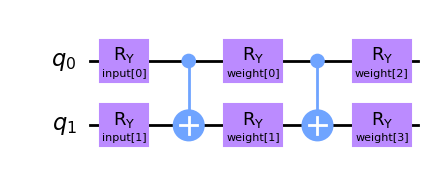

In [174]:
from qiskit.circuit import ParameterVector

inputs2 = ParameterVector("input", 2)
weights2 = ParameterVector("weight", 4)
print(f"input parameters: {[str(item) for item in inputs2.params]}")
print(f"weight parameters: {[str(item) for item in weights2.params]}")

qc2 = QuantumCircuit(2)
qc2.ry(inputs2[0], 0)
qc2.ry(inputs2[1], 1)
qc2.cx(0, 1)
qc2.ry(weights2[0], 0)
qc2.ry(weights2[1], 1)
qc2.cx(0, 1)
qc2.ry(weights2[2], 0)
qc2.ry(weights2[3], 1)

qc2.draw(output="mpl")

In [175]:
from qiskit_machine_learning.neural_networks import SamplerQNN

sampler_qnn = SamplerQNN(circuit=qc2, input_params=inputs2, weight_params=weights2)
sampler_qnn

In [176]:
estimator_qnn_input = algorithm_globals.random.random(estimator_qnn.num_inputs)
estimator_qnn_weights = algorithm_globals.random.random(estimator_qnn.num_weights)

In [177]:
print(
    f"Number of input features for EstimatorQNN: {estimator_qnn.num_inputs} \nInput: {estimator_qnn_input}"
)
print(
    f"Number of trainable weights for EstimatorQNN: {estimator_qnn.num_weights} \nWeights: {estimator_qnn_weights}"
)

Number of input features for EstimatorQNN: 1 
Input: [0.77395605]
Number of trainable weights for EstimatorQNN: 1 
Weights: [0.43887844]


In [178]:
sampler_qnn_input = algorithm_globals.random.random(sampler_qnn.num_inputs)
sampler_qnn_weights = algorithm_globals.random.random(sampler_qnn.num_weights)

print(
    f"Number of input features for SamplerQNN: {sampler_qnn.num_inputs} \nInput: {sampler_qnn_input}"
)
print(
    f"Number of trainable weights for SamplerQNN: {sampler_qnn.num_weights} \nWeights: {sampler_qnn_weights}"
)


Number of input features for SamplerQNN: 2 
Input: [0.85859792 0.69736803]
Number of trainable weights for SamplerQNN: 4 
Weights: [0.09417735 0.97562235 0.7611397  0.78606431]
